In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random

import torch
import torch.nn as nn
import torch.nn.functional as F

import math
import time
import pandas as pd

from AFSParser import build_dataset

In [2]:
# Load the data from the file
X, y0 = build_dataset(False, "/scratch/04703/sravula/UTAFSDataNew")

61


61it [04:11,  4.12s/it]


In [3]:
print(X.dtype)
print(y0.dtype)

float64
float64


In [4]:
freq_vals = torch.from_numpy(X).float() 
print(freq_vals.shape)

torch.Size([1406, 9999])


In [5]:
x_raw = torch.from_numpy(y0).float()
print(x_raw.shape)

torch.Size([1406, 9999, 10, 2])


In [6]:
torch.save(freq_vals, "/scratch/04703/sravula/UTAFSDataNew/FREQ_VALS.pt")
torch.save(x_raw, "/scratch/04703/sravula/UTAFSDataNew/X_RAW.pt")

In [27]:
print(freq_vals[0].nonzero().numel())
print(x_raw[0,:,0,0].nonzero().numel())

1000
1000


In [30]:
zero_inds = freq_vals[0][freq_vals[0] == 0]
print(len(zero_inds))

8999


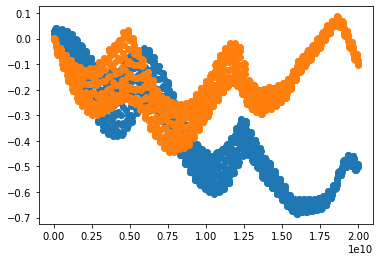

In [29]:
plt.figure()
plt.scatter(freq_vals[0].numpy().flatten(), x_raw[0,:,0,0].numpy().flatten())
plt.scatter(freq_vals[0].numpy().flatten(), x_raw[0,:,0,1].numpy().flatten())
plt.show()

# Let's strip all the unnecessary zero values!

In [31]:
new_freqs = []

for i in range(freq_vals.shape[0]):
    temp = freq_vals[i]
    new_freqs.append(temp[temp.nonzero(as_tuple=True)])

In [33]:
print(len(new_freqs))

1406


In [34]:
new_x = []

for i in range(freq_vals.shape[0]):
    temp = freq_vals[i]
    new_x.append(x_raw[i][temp.nonzero(as_tuple=True)])

In [36]:
print(len(new_x))

1406


In [40]:
torch.save(new_freqs, "/scratch/04703/sravula/UTAFSDataNew/FREQ_VALS.pt")
torch.save(new_x, "/scratch/04703/sravula/UTAFSDataNew/X_RAW.pt")

In [41]:
a = torch.load("/scratch/04703/sravula/UTAFSDataNew/FREQ_VALS.pt")
b = torch.load("/scratch/04703/sravula/UTAFSDataNew/X_RAW.pt")

In [46]:
print(len(a))

print(a[0].shape)
print(a[42].shape)
print(a[1000].shape)

1406
torch.Size([1000])
torch.Size([9998])
torch.Size([2999])


In [48]:
print(len(b))

print(b[0].shape)
print(b[42].shape)
print(b[1000].shape)

1406
torch.Size([1000, 10, 2])
torch.Size([9998, 10, 2])
torch.Size([2999, 10, 2])


In [50]:
lens = [x.numel() for x in a]

mini = np.min(np.array(lens))
maxi = np.max(np.array(lens))

print(mini)
print(maxi)

100
9999


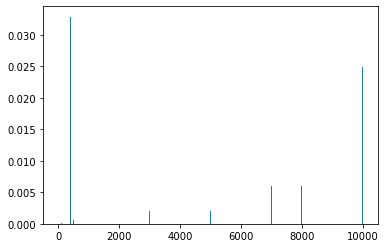

In [56]:
plt.figure()
plt.hist(lens, bins=1000, range=(0, 9999), density=True)
plt.show()